In [15]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from datetime import datetime
from random import uniform
#from config import api_key
api_key = "146d30761bbdfa3e44f28fe3723e8d06"
# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

# Generate Cites List 

In [16]:
# Randomly generate a list of 1500 cities. 
for x in range(1500):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      616
City       616
Country    616
dtype: int64

#  API Calls

In [17]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


C:\Users\pinel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pinel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pinel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pinel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pinel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is depreca

------------------------
Proceesing: City #  1  |  Inhambane MZ
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=inhambane
------------------------
Proceesing: City #  2  |  Butaritari KI
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=butaritari
------------------------
Proceesing: City #  3  |  Sao Filipe CV
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=sao+filipe
------------------------
Proceesing: City #  4  |  Trelew AR
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=trelew
------------------------
Proceesing: City #  5  |  Caravelas BR
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=caravelas
------------------------
Proceesing: City #  6  |  Yellowknife CA
http://api.openweathermap.org/data/2.5/weather?appi

------------------------
Proceesing: City #  46  |  Humaita AR
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=humaita
------------------------
Proceesing: City #  47  |  Alofi NU
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=alofi
------------------------
Proceesing: City #  48  |  Namibe AO
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=namibe
------------------------
Proceesing: City #  49  |  Aitape PG
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=aitape
------------------------
Proceesing: City #  50  |  Mount Gambier AU
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=mount+gambier
------------------------
Proceesing: City #  51  |  Saint George GR
http://api.openweathermap.org/data/2.5/weather?appid=146d3

------------------------
Proceesing: City #  93  |  Hagere Selam ET
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=hagere+selam
------------------------
Proceesing: City #  94  |  Taloqan AF
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=taloqan
------------------------
Proceesing: City #  95  |  Ribeira Grande PT
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=ribeira+grande
------------------------
Proceesing: City #  96  |  Kushima JP
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=kushima
------------------------
Proceesing: City #  97  |  Eureka US
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=eureka
------------------------
Proceesing: City #  98  |  Bredasdorp ZA
http://api.openweathermap.org/data/2.5/wea

------------------------
Proceesing: City #  139  |  Hearst CA
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=hearst
------------------------
Proceesing: City #  140  |  Tokomaru NZ
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=tokomaru
------------------------
Proceesing: City #  141  |  Jumla NP
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=jumla
------------------------
Proceesing: City #  142  |  Praia BR
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=praia
------------------------
Proceesing: City #  143  |  Bethel US
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=bethel
------------------------
Proceesing: City #  144  |  Grindavik IS
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e

------------------------
Proceesing: City #  185  |  Airai TL
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=airai
------------------------
Proceesing: City #  186  |  New Norfolk AU
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=new+norfolk
------------------------
Proceesing: City #  187  |  Kindu CD
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=kindu
------------------------
Proceesing: City #  188  |  Esperance TT
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=esperance
------------------------
Proceesing: City #  189  |  Coquimbo CL
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=coquimbo
------------------------
Proceesing: City #  190  |  Kolosovka RU
http://api.openweathermap.org/data/2.5/weather?appid=

------------------------
Proceesing: City #  230  |  Shitanjing CN
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=shitanjing
------------------------
Proceesing: City #  231  |  Russell AR
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=russell
------------------------
Proceesing: City #  232  |  Nome US
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=nome
------------------------
Proceesing: City #  233  |  Nanakuli US
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=nanakuli
City not found, skipping...
------------------------
Proceesing: City #  234  |  Batemans Bay AU
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=batemans+bay
------------------------
Proceesing: City #  235  |  Yilan TW
http://api.openweatherm

------------------------
Proceesing: City #  277  |  Tuatapere NZ
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=tuatapere
------------------------
Proceesing: City #  278  |  Vilhena BR
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=vilhena
------------------------
Proceesing: City #  279  |  Mairana BO
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=mairana
------------------------
Proceesing: City #  280  |  Mgandu TZ
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=mgandu
------------------------
Proceesing: City #  281  |  Las Lomas PE
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=las+lomas
------------------------
Proceesing: City #  282  |  Sassandra CI
http://api.openweathermap.org/data/2.5/weather?appid=

------------------------
Proceesing: City #  323  |  College US
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=college
------------------------
Proceesing: City #  324  |  Vao EE
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=vao
------------------------
Proceesing: City #  325  |  Port Blair IN
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=port+blair
------------------------
Proceesing: City #  326  |  Galle US
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=galle
------------------------
Proceesing: City #  327  |  Dobrinka RU
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=dobrinka
------------------------
Proceesing: City #  328  |  Dhamtari IN
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bb

------------------------
Proceesing: City #  369  |  Kruisfontein ZA
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=kruisfontein
------------------------
Proceesing: City #  370  |  General Pico AR
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=general+pico
------------------------
Proceesing: City #  371  |  Tessalit ML
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=tessalit
------------------------
Proceesing: City #  372  |  Melfi IT
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=melfi
------------------------
Proceesing: City #  373  |  Hokitika NZ
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=hokitika
------------------------
Proceesing: City #  374  |  Ternate PH
http://api.openweathermap.org/data/2.5/we

------------------------
Proceesing: City #  415  |  Lere TD
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=lere
------------------------
Proceesing: City #  416  |  Perni GR
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=perni
------------------------
Proceesing: City #  417  |  Abakaliki NG
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=abakaliki
------------------------
Proceesing: City #  418  |  Rosario UY
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=rosario
------------------------
Proceesing: City #  419  |  Araouane ML
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=araouane
------------------------
Proceesing: City #  420  |  Pudozh RU
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdf

------------------------
Proceesing: City #  461  |  Ishigaki JP
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=ishigaki
------------------------
Proceesing: City #  462  |  Sabang PH
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=sabang
------------------------
Proceesing: City #  463  |  Pizhanka RU
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=pizhanka
------------------------
Proceesing: City #  464  |  Ahipara NZ
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=ahipara
------------------------
Proceesing: City #  465  |  Samarai PG
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=samarai
------------------------
Proceesing: City #  466  |  Bonnyville CA
http://api.openweathermap.org/data/2.5/weather?appid=146

------------------------
Proceesing: City #  508  |  Barabai ID
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=barabai
------------------------
Proceesing: City #  509  |  Tsiroanomandidy MG
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=tsiroanomandidy
------------------------
Proceesing: City #  510  |  Corn Island NI
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=corn+island
------------------------
Proceesing: City #  511  |  Husavik CA
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=husavik
------------------------
Proceesing: City #  512  |  Santa Ines EC
http://api.openweathermap.org/data/2.5/weather?appid=146d30761bbdfa3e44f28fe3723e8d06&units=IMPERIAL&q=santa+ines
------------------------
Proceesing: City #  513  |  Arcos de la Frontera ES
http://api.openwea

In [18]:
clean_cities_df.count()

City                552
Country             552
Temperature (F)     552
Latitude            552
Longitude           552
Humidity (%)        552
Cloudiness (%)      552
Wind Speed (mph)    552
dtype: int64

In [19]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Inhambane,MZ,76.26,-23.87,35.38,100,8,10.22
1,Butaritari,KI,81.16,3.07,172.79,100,64,14.47
2,Sao Filipe,CV,74.28,14.9,-24.5,99,0,12.68
3,Trelew,AR,80.62,-43.25,-65.31,27,0,4.97
4,Caravelas,BR,80.35,-17.73,-39.27,100,32,9.78
5,Yellowknife,CA,10.4,62.45,-114.38,92,75,3.36
6,Ushuaia,AR,59,-54.81,-68.31,51,40,49.44
7,Bambous Virieux,MU,73.4,-20.34,57.76,88,20,3.36
8,Kapaa,US,78.94,22.08,-159.32,68,90,13.87
9,Meulaboh,ID,76.26,4.14,96.13,100,68,5.19


In [22]:
# Save data to a CSV file
clean_cities_df.to_csv("City_data.csv")

# Latitude vs. Temperature

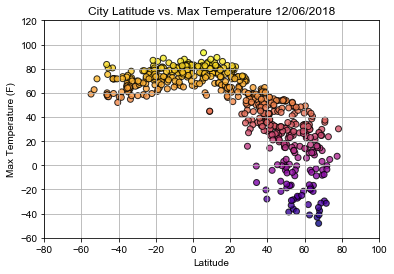

In [23]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

# Latitude vs. Humidity (%)

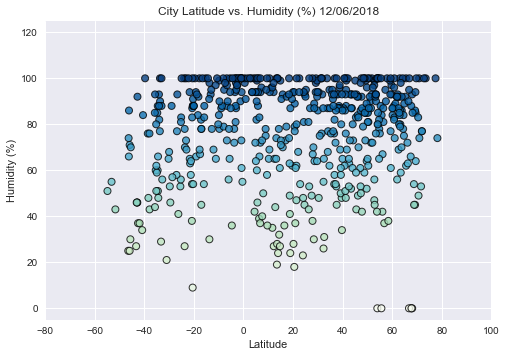

In [24]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness (%)

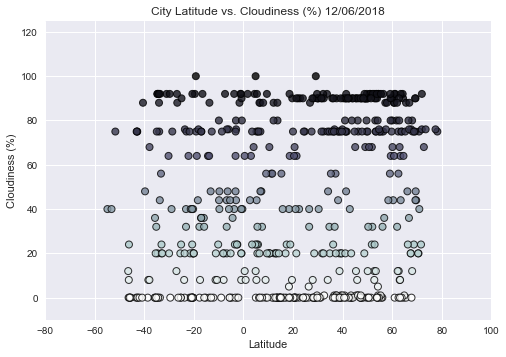

In [25]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed (mph)

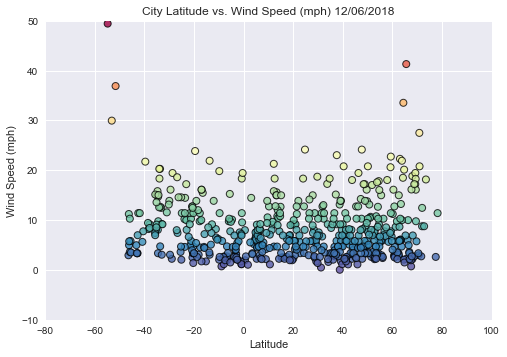

In [26]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()

# Analysis

    * During the end of the calendar year, i.e., November, the temperature is cooler in the Northern hemisphere, where latitudes are greater than 0 and the temperature is warmer in the Southern hemisphere, where latitudes are less than 0.
    
    * There was no relationship between latitude and humidity, cloudiness and wind speed. 
    
    * The majority of the cities generated are in the Northern hemisphere.